In [346]:
import pandas as pd
import os
import datetime as dt
import re
import xlsxwriter
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

In [347]:
data = pd.read_excel("~/Desktop/GIT/ЭКОПСИ Base_18.10.xlsx")
grades = pd.read_excel("~/Desktop/GIT/Грейды.xlsx")
weights = pd.read_excel("~/Desktop/GIT/Веса.xlsx")

In [348]:
# Добавляем новый столбец для рассчета полной ставки для всех сторудников
data['ФОТ 1'] = data['ФОТ'] * (1 / data['Ставка'])

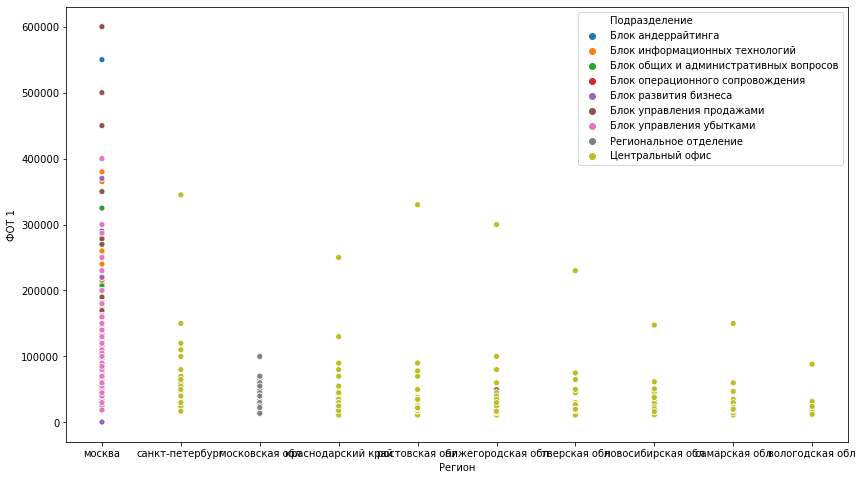

In [349]:
# Распределение уровня зарплат по террирориальному признаку
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Регион', y='ФОТ 1', hue='Подразделение')

In [350]:
# Описательные статистики по уровню зарплат, сгруппированные по регионам
describe_fot = data[['ГК/Филиал', 'Регион', 'Подразделение', 'Департамент', 'Отдел', 'Должность',
       'ФОТ 1']]
pd.set_option('display.max_rows', None)
describe_fot.groupby(['Регион', 'Должность']).describe()

ФОТ 1  \
                                                                       count   
Регион             Должность                                                   
вологодская обл    Ведущий специалист                                    1.0   
                   Водитель                                              1.0   
                   Директор филиала                                      1.0   
                   Заместитель директора филиала                         1.0   
                   Заместитель руководителя департамента                 1.0   
                   Менеджер по развитию и сопровождению агентских ...    5.0   
                   Менеджер по страхованию                               2.0   
                   Офис-менеджер                                         1.0   
                   Руководитель департамента                             3.0   
                   Руководитель отдела                                   1.0   
                   Руководитель отделения                                1.0   
                   Специалист                                            3.0   
                   Юрисконсульт                                          1.0   
краснодарский край Архивариус                                            1.0   
                   Ведущий специалист                                    3.0   
                   Водитель                                              2.0   
                   Главный менеджер по страхованию                      12.0   
                   Главный специалист                                    5.0   
                   Директор филиала                                      1.0   
                   Заместитель директора филиала                         2.0   
                   Заместитель руководителя департамента                 1.0   
                   Заместитель руководителя отделения                    1.0   
                   Менеджер клиентского зала                             8.0   
                   Менеджер по персоналу                                 1.0   
                   Менеджер по развитию и сопровождению агентских ...    6.0   
                   Менеджер по страхованию                              30.0   
                   Офис-менеджер                                         1.0   
                   Руководитель департамента                             2.0   
                   Руководитель отдела                                   6.0   
                   Руководитель отделения                                8.0   
                   Специалист                                            9.0   
                   Специалист по охране труда                            1.0   
                   Старший юрисконсульт                                  2.0   
                   Юрисконсульт                                          4.0   
москва             Администратор                                         2.0   
                   Аналитик                                             46.0   
                   Андеррайтер                                          12.0   
                   Архитектор инфраструктурных решений                   2.0   
                   Бухгалтер                                             1.0   
                   Ведущий актуарий                                      7.0   
                   Ведущий аналитик                                      4.0   
                   Ведущий андеррайтер                                   1.0   
                   Ведущий бухгалтер                                     8.0   
                   Ведущий менеджер по работе с VIP-клиентами            8.0   
                   Ведущий менеджер по страхованию                       7.0   
                   Ведущий разработчик                                   2.0   
                   Ведущий специалист                                  105.0   
                   Ведущий экономист                                   

In [351]:
# Таблица с грейдами
grades

,Грейд,Уровень необходимой квалификации,Уровень свободы в принятии решений,Роль в формировании методологии и правил своего подразделения,Роль в формировании методологии и правил Компании,Количество людей в административном подчинении,"Количество функциональных подчинённых ИЛИ внешних агентов, не находящихся в административном подчинении",Цель общения внутри Компании,Годовой объём прямого влияния на финансовый результат Компании,Стоимость разовой ошибки
0,1,1,1,1,1,1,1,1,1,1
1,2,2,2,1,1,1,1,1,1,1
2,3,2,2,1,1,1,1,2,1,1
3,4,3,2,2,2,2,1,2,2,2
4,5,3,3,2,2,2,2,2,2,2
5,6,4,3,2,2,3,2,2,3,3
6,7,4,4,2,3,3,2,2,3,3
7,8,5,4,2,3,4,3,2,3,4
8,9,5,4,3,4,4,3,3,4,4
9,10,6,4,3,4,5,4,3,4,4


In [352]:
# Таблица с весами
weights

,Уровень необходимой квалификации,Уровень свободы в принятии решений,Роль в формировании методологии и правил своего подразделения,Роль в формировании методологии и правил Компании,Количество людей в административном подчинении,"Количество функциональных подчинённых ИЛИ внешних агентов, не находящихся в административном подчинении",Цель общения внутри Компании,Годовой объём прямого влияния на финансовый результат Компании,Стоимость разовой ошибки,Сумма
0,0.15,0.08,0.07,0.09,0.1,0.15,0.07,0.14,0.15,1


In [353]:
# Вычисление уровня грейда
column_lst = ['Уровень необходимой квалификации', 'Уровень свободы в принятии решений',
       'Роль в формировании методологии и правил своего подразделения',
       'Роль в формировании методологии и правил Компании',
       'Количество людей в административном подчинении',
       'Количество функциональных подчинённых ИЛИ внешних агентов, не находящихся в административном подчинении',
       'Цель общения внутри Компании',
       'Годовой объём прямого влияния на финансовый результат Компании ',
       'Стоимость разовой ошибки']

grade_lst = []

for (j, row_data) in data.iterrows():
    grade_value = {a: 0 for a in range(12)}
    for (i, row) in grades.iterrows():
        sum = 0
        for column in column_lst:
            sum += abs(row_data[column] - row[column]) - weights.iloc[0][column]       
        grade_value[i] = sum

    grade_lst.append(min(grade_value, key=grade_value.get) + 1)

In [354]:
# Добавляем список с грейдами в основную таблицу
data['Грейд'] = grade_lst 

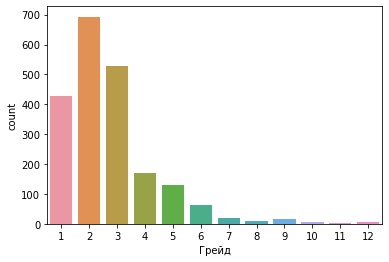

In [355]:
# Распределение численности сотрудников по грейдам
sns.countplot(data['Грейд'])

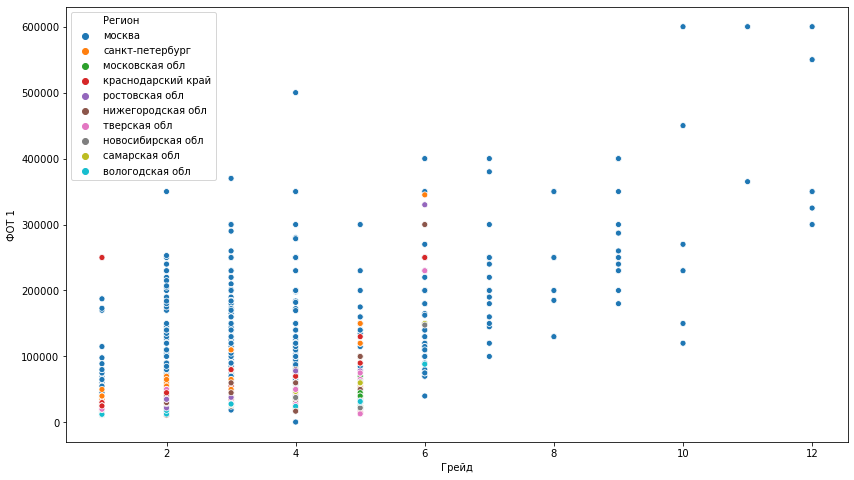

In [357]:
# Распределение уровня зарплаты относительно грейда и региона
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Грейд', y='ФОТ 1', hue='Регион')

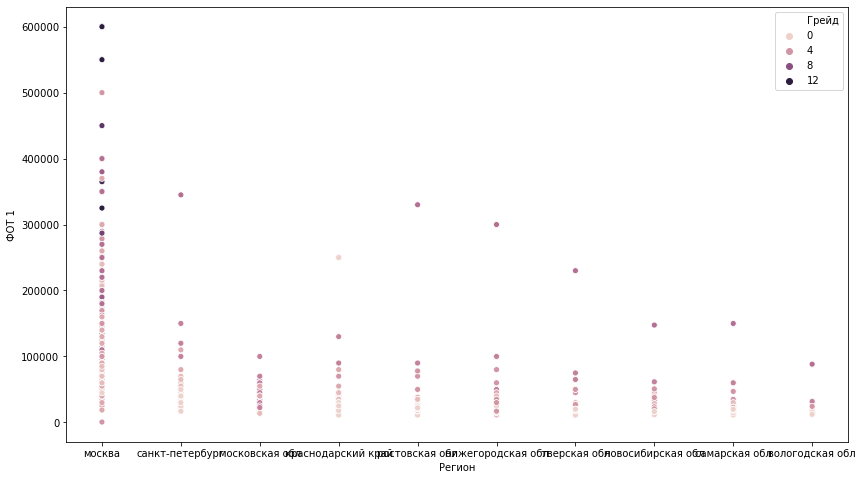

In [358]:
# Региональное распределение по уровню з/п и грейду
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Регион', y='ФОТ 1', hue='Грейд')